# **POSTTEST 6**

Note:

Saya ganti dataset bang, dataset sebelumnya terlalu rendah r2_score-nya

link : https://www.kaggle.com/datasets/whigmalwhim/steam-releases

Target : 'rating'

## **Import Library**

In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential, layers
import pandas as pd
import matplotlib.pyplot as plt

## **Membaca data dari file CSV ke dalam DataFrame**

In [2]:
df = pd.read_csv("game_data_all.csv")

## **Split dataset menjadi train dan test**

In [3]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

## **Melakukan preprocessing**

### -Drop Kolom yang menurut saya tidak terpakai

In [4]:
df = df.drop(['link', 'Unnamed: 0', 'detected_technologies', 'store_asset_mod_time', 'store_genres'], axis=1)

### -Data Cleaning

#### Sebelum

In [5]:
df.isnull().sum()

game                      0
release                   0
peak_players              0
positive_reviews          0
negative_reviews          0
total_reviews             0
rating                    0
primary_genre            10
publisher               442
developer               126
review_percentage     19804
players_right_now         6
24_hour_peak              6
all_time_peak             0
all_time_peak_date        6
dtype: int64

In [6]:
total_records = df.shape[0]
print("Jumlah total record sebelum : ", total_records)

Jumlah total record sebelum :  67571


### Sesudah

In [7]:
# Menghapus baris dengan nilai null
df = df.dropna()

df.isnull().sum()

game                  0
release               0
peak_players          0
positive_reviews      0
negative_reviews      0
total_reviews         0
rating                0
primary_genre         0
publisher             0
developer             0
review_percentage     0
players_right_now     0
24_hour_peak          0
all_time_peak         0
all_time_peak_date    0
dtype: int64

In [8]:
total_records = df.shape[0]
print("Jumlah total record sesudah : ", total_records)

Jumlah total record sesudah :  47374


### -Memeriksa data duplikat

In [9]:
print("Jumlah nilai Duplikat:", df.duplicated().sum())

Jumlah nilai Duplikat: 0


## **Menggunakan sequential model**

In [10]:
model = Sequential([
    layers.Dense(64, activation='relu', input_shape=[1]),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='linear')
])

# Kompilasi model dengan loss function MSE
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error', 'mean_squared_error'])

# Mengambil fitur ('review_percentage') dan label ('rating') dari DataFrame 'df'
game_X, game_y = df[['review_percentage']], df['rating']

# Membagi dataset menjadi data pelatihan dan data pengujian
X_train, X_test, y_train, y_test = train_test_split(
    game_X, game_y, test_size=0.2, random_state=42
)

# Melatih model dan simpan riwayat pelatihan
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluasi model
loss, mae, mse = model.evaluate(X_test, y_test)
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')

Epoch 1/10
1185/1185 [==============================] - 4s 3ms/step - loss: 156.7250 - mean_absolute_error: 6.5935 - mean_squared_error: 156.7250 - val_loss: 36.6678 - val_mean_absolute_error: 4.4845 - val_mean_squared_error: 36.6678
Epoch 2/10
1185/1185 [==============================] - 3s 3ms/step - loss: 33.5897 - mean_absolute_error: 4.3853 - mean_squared_error: 33.5897 - val_loss: 32.3387 - val_mean_absolute_error: 4.3264 - val_mean_squared_error: 32.3387
Epoch 3/10
1185/1185 [==============================] - 3s 2ms/step - loss: 28.5505 - mean_absolute_error: 3.9548 - mean_squared_error: 28.5505 - val_loss: 24.2668 - val_mean_absolute_error: 3.5327 - val_mean_squared_error: 24.2668
Epoch 4/10
1185/1185 [==============================] - 3s 3ms/step - loss: 23.3716 - mean_absolute_error: 3.4054 - mean_squared_error: 23.3716 - val_loss: 22.4918 - val_mean_absolute_error: 3.2982 - val_mean_squared_error: 22.4918
Epoch 5/10
1185/1185 [==============================] - 3s 3ms/step - 

## **Menggunakan r2_score (dari sklearn.metrics)**

In [11]:
from sklearn.metrics import r2_score

# Prediksi model
y_pred = model.predict(X_test)

# Menghitung R-squared (R2)
r2 = r2_score(y_test, y_pred)
print(f'R-squared (R2): {r2}')

297/297 [==============================] - 1s 2ms/step
R-squared (R2): 0.8837467634126824


# **Membuat grafik yang menampilkan pergerakan metrik dan loss**

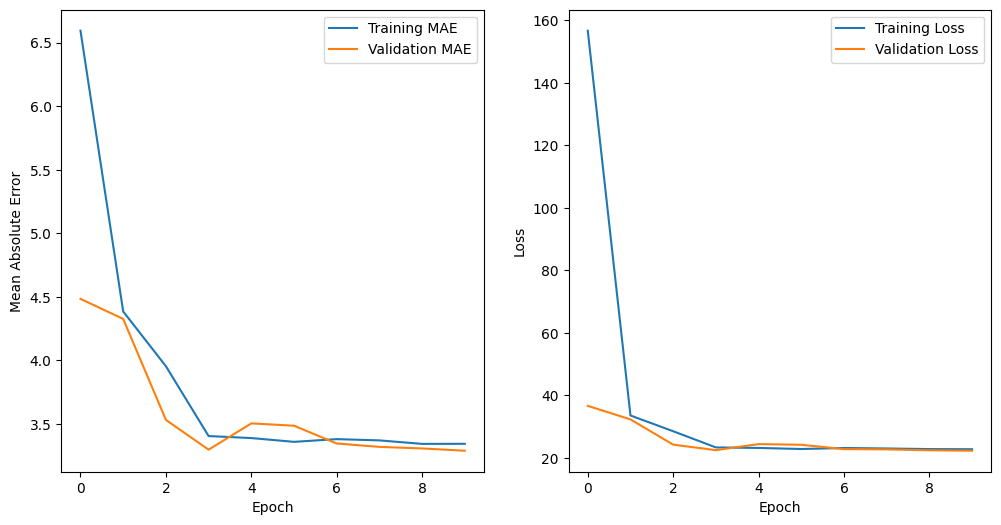

In [12]:
# Ambil metrik pelatihan dan validasi dari riwayat
mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']
mse = history.history['mean_squared_error']
val_mse = history.history['val_mean_squared_error']

# Ambil loss dari riwayat
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot MAE dan Loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(mae, label='Training MAE')
plt.plot(val_mae, label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()